## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np

import string
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data=pd.read_csv('/content/blogs.csv')

# EDA

In [ ]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


### Checking for Null values

In [ ]:
data.isnull().sum()

,0
Data,0
Labels,0


### Checking for duplicates

In [ ]:
data[data.duplicated()]

,Data,Labels


### Downloading Stopwords,Punctuations and wordnet

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Defined an Clean Text Function

This function includes removing punctuations,transforming into lower case letters,tokenization,removing stopwords and applying Lemmatization technique.

In [ ]:
def clean_text(text):

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stopwords.words('english')]

    lemmer=WordNetLemmatizer()
    tokens=[lemmer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [ ]:
data['Cleaned_Data'] = data['Data'].apply(clean_text)

## TF-Idf Vectorizer

Tfidfvectorizer is used to remove the high and low frequency terms and for converting text data into numerical format for the Naive Bayes model.

In [ ]:
vectorizer = TfidfVectorizer(min_df=0.5, max_df=0.85)
x = vectorizer.fit_transform(data['Cleaned_Data'])
y = data['Labels']


In [ ]:
data

,Data,Labels,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion120945 ...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc837...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc836...


### Hyperparameter Tuning

To find the best min_df and max_df value,we are using parameter tuning here.

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


param_grid = {
    'tfidf__min_df': [1, 2,0.1,0.5,1.5,0.01],
    'tfidf__max_df': [0.85, 0.9, 0.95, 1.0]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(data['Cleaned_Data'], y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/sk

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tfidf__max_df': [0.85, 0.9, 0.95, 1.0],
                         'tfidf__min_df': [1, 2, 0.1, 0.5, 1.5, 0.01]})

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'tfidf__max_df': 0.95, 'tfidf__min_df': 2}
Best cross-validation score: 0.8440000000000001


### Splitting into Target and independent variables

In [ ]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)
x = vectorizer.fit_transform(data['Cleaned_Data'])
y = data['Labels']

In [ ]:
x.shape

(2000, 16424)

In [ ]:
y

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


## Train-Test Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=36)

### Applying Naive Bayes Model

In [ ]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(x_test)

## Performing Sentiment Analysis

We are performing sentiment analysis on the blog posts to categorize them as positive, negative, or neutral.


In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
data['Sentiment'] = data['Data'].apply(get_sentiment)

In [ ]:
sentiment_distribution = data.groupby('Labels')['Sentiment'].value_counts().unstack()   #unstack reshapes the data

## Distribution of Sentiments across Different Categories

In [ ]:
print(sentiment_distribution )

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


### Plotting of Sentiment Distribution Across Categories

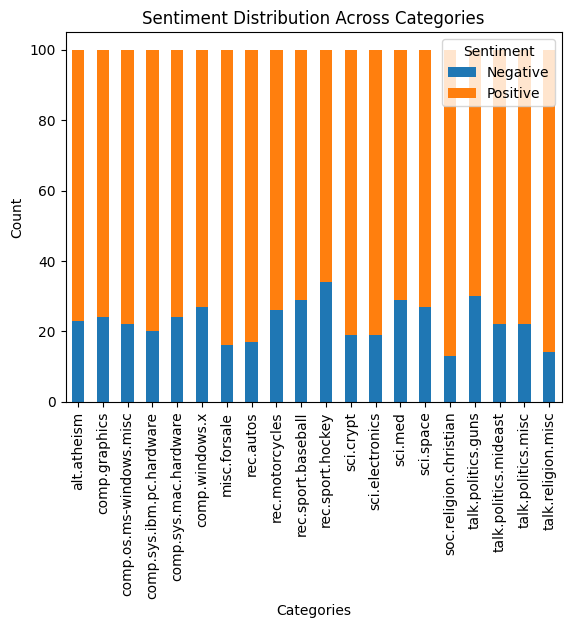

In [ ]:
import matplotlib.pyplot as plt

# Group by Labels and Sentiment and count occurrences
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack()
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


### Evaluation Metrics for Naive Bayes Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Naive_Bayes model:", round(accuracy*100,2))

Accuracy for Naive_Bayes model: 83.83


In [ ]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.63      0.86      0.73        22
           comp.graphics       0.67      0.80      0.73        30
 comp.os.ms-windows.misc       0.66      0.88      0.75        33
comp.sys.ibm.pc.hardware       0.80      0.71      0.75        34
   comp.sys.mac.hardware       0.90      0.79      0.84        33
          comp.windows.x       1.00      0.53      0.69        40
            misc.forsale       0.91      0.85      0.88        34
               rec.autos       0.94      0.88      0.91        33
         rec.motorcycles       0.97      0.97      0.97        30
      rec.sport.baseball       1.00      0.86      0.93        36
        rec.sport.hockey       0.88      1.00      0.94        30
               sci.crypt       0.87      0.96      0.92        28
         sci.electronics       0.93      0.90      0.91        29
                 sci.med       0.76      0.88      0.81        25
         

## Conclusions :

**Findings from Sentiment Analysis :-**

All Categories are separated into negative and positive sentiments and also from above we can conclude that Most of the blog posts are kept Positively.

Naive Bayes is often a strong baseline for text classification tasks like this one. However, it might not capture complex word patterns due to its assumption that features (words) are independent of each other.

In summary, while the Naive Bayes model performs well on this task and sentiment analysis provides valuable insights, some challenges—like handling imbalanced data, tuning TF-IDF parameters, and improving the accuracy of sentiment classification—remain. These challenges offer opportunities for further refinement and experimentation in future iterations of the project.